Importing libraries

In [76]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import re
import nltk
import tensorflow as tf

Reading the CSV file

In [43]:
reviews = pd.read_csv("C:/Users/kaika/OneDrive/Documents/movie.csv")
reviews

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


Checking for unique values

In [44]:
reviews.nunique()

text     39723
label        2
dtype: int64

EXPLORATORY DATA ANALYSIS :

Checking for null values

In [45]:
print(reviews['text'].isnull().sum())
print(reviews['label'].isnull().sum()) 

0
0


Deleting duplicates

In [46]:
reviews = reviews.drop_duplicates() 
reviews

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


Checking what values are in "label"

In [47]:
reviews['label'].unique()

array([0, 1], dtype=int64)

Checking for imbalance

In [48]:
reviews['label'].value_counts() 

label
1    19908
0    19815
Name: count, dtype: int64

Creating length column

In [49]:
reviews['length'] = reviews['text'].str.len()
#reviews['Length'] = reviews['text'].apply(len)
reviews


C:\Users\kaika\AppData\Local\Temp\ipykernel_141568\3985990429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['length'] = reviews['text'].str.len()


,text,label,length
0,I grew up (b. 1965) watching and loving the Th...,0,874
1,"When I put this movie in my DVD player, and sa...",0,1811
2,Why do people who do not know what a particula...,0,983
3,Even though I have great interest in Biblical ...,0,351
4,Im a die hard Dads Army fan and nothing will e...,1,983
...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,3111
39996,This movie is an incredible piece of work. It ...,1,291
39997,My wife and I watched this movie because we pl...,0,1092
39998,"When I first watched Flatliners, I was amazed....",1,1045


Separating positive and negataive reviews for analysis

In [50]:
pos = reviews[reviews['label']==1]
neg = reviews[reviews['label']==0]

Looking at Review_Length vs Sentiment graph

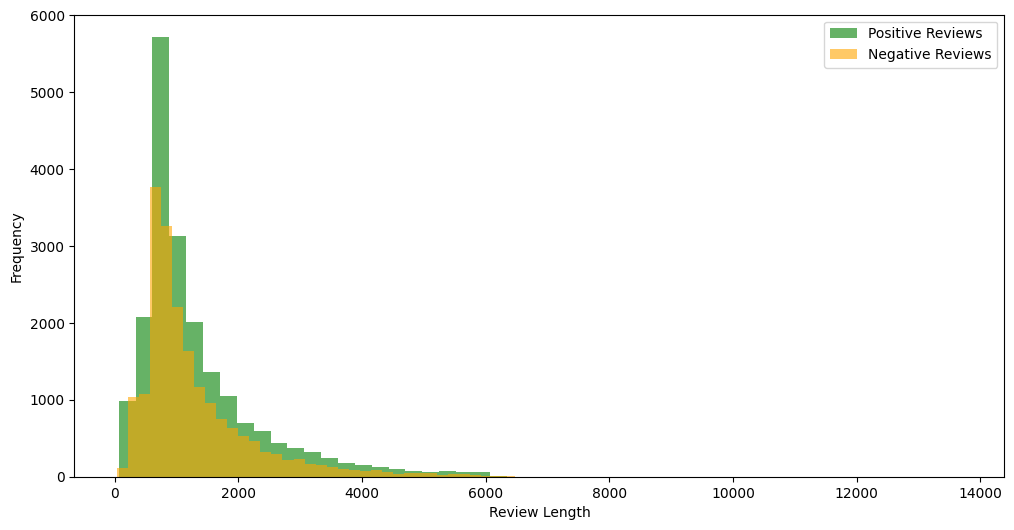

In [51]:
plt.figure(figsize=(12,6))

#plt.scatter(data = reviews, y = 'label', x = 'length')

#plt.hist(x="length", y=,data=pos, bins=50, color='green', label="Positive Reviews")
#plt.hist(x="length", data=neg, bins=50, color='orange', label="Negative Reviews")

pos['length'].plot(bins=50, kind='hist', color='green', label='Positive Reviews', alpha=0.6)
neg['length'].plot(bins=50, kind='hist', color='orange', label='Negative Reviews', alpha=0.6)

plt.legend()
plt.xlabel("Review Length")
plt.show()

#sb.scatterplot(y='length', x='label', data = reviews)

In [52]:
reviews = reviews.drop(['length'], axis=1)

DATA PRE-PROCESSING :

In [53]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\kaika\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\kaika\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\kaika\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\kaika\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\kaika\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

Converting to lowercase

In [54]:
reviews['text']=reviews['text'].str.lower() 
reviews

,text,label
0,i grew up (b. 1965) watching and loving the th...,0
1,"when i put this movie in my dvd player, and sa...",0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1
...,...,...
39995,"""western union"" is something of a forgotten cl...",1
39996,this movie is an incredible piece of work. it ...,1
39997,my wife and i watched this movie because we pl...,0
39998,"when i first watched flatliners, i was amazed....",1


Removing stopwords

In [55]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [56]:
stop_words = set(stopwords.words('english')) 
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [57]:
def remove_stop(x): 
    removed = ""
    for word in str(x).split():
        if word not in stop_words:
            removed = removed + word + " "
    return(removed)

reviews['text']=reviews['text'].apply(lambda x : remove_stop(x)) 
reviews

,text,label
0,grew (b. 1965) watching loving thunderbirds. m...,0
1,"put movie dvd player, sat coke chips, expectat...",0
2,people know particular time past like feel nee...,0
3,"even though great interest biblical movies, bo...",0
4,im die hard dads army fan nothing ever change ...,1
...,...,...
39995,"""western union"" something forgotten classic we...",1
39996,movie incredible piece work. explores every no...,1
39997,wife watched movie plan visit sicily stromboli...,0
39998,"first watched flatliners, amazed. necessary fe...",1


Removing punctuations

In [58]:
def remove_punc(x): 
    x = re.sub(pattern= "[^\w\s]", repl= "", string= x)
    return x

"""
def remove_punc(x):
    removed = ""
    punc =  '''!()-[]{};:'"\,./?@#$%^&*_~'''
    for i in x:
        if i not in punc:
            removed += i
    return (removed)
"""

reviews['text']=reviews['text'].apply(lambda x : remove_punc(x)) 
reviews

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\,'
<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\,'
C:\Users\kaika\AppData\Local\Temp\ipykernel_141568\2436398989.py:2: SyntaxWarning: invalid escape sequence '\w'
  x = re.sub(pattern= "[^\w\s]", repl= "", string= x)
C:\Users\kaika\AppData\Local\Temp\ipykernel_141568\2436398989.py:5: SyntaxWarning: invalid escape sequence '\,'
  """


,text,label
0,grew b 1965 watching loving thunderbirds mates...,0
1,put movie dvd player sat coke chips expectatio...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movies bor...,0
4,im die hard dads army fan nothing ever change ...,1
...,...,...
39995,western union something forgotten classic west...,1
39996,movie incredible piece work explores every noo...,1
39997,wife watched movie plan visit sicily stromboli...,0
39998,first watched flatliners amazed necessary feat...,1


Removing numbers

In [59]:
def remove_num(x):
    removed = ""
    for i in str(x):
        if i.isdigit() == True:
            continue
        else:
            removed += i
    return (removed)

reviews['text']=reviews['text'].apply(lambda x : remove_num(x)) 
reviews

,text,label
0,grew b watching loving thunderbirds mates sch...,0
1,put movie dvd player sat coke chips expectatio...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movies bor...,0
4,im die hard dads army fan nothing ever change ...,1
...,...,...
39995,western union something forgotten classic west...,1
39996,movie incredible piece work explores every noo...,1
39997,wife watched movie plan visit sicily stromboli...,0
39998,first watched flatliners amazed necessary feat...,1


Removing repeating words in a review

In [60]:
def remove_repeat(x):
    seen = []
    words = str(x).split()
    for i in words:
        if i not in seen:
            seen.append(i)
        else:
            words.remove(i)
    x = " ".join(words)
    return (x)

reviews['text']=reviews['text'].apply(lambda x : remove_repeat(x)) 
reviews

,text,label
0,grew b watching loving mates watched played sc...,0
1,put dvd player sat coke chips hoping would con...,0
2,people particular past feel need try define ot...,0
3,even though great interest biblical movies bor...,0
4,im die hard dads army fan nothing ever change ...,1
...,...,...
39995,union something forgotten classic perhaps reas...,1
39996,movie incredible piece work explores every noo...,1
39997,wife watched plan visit sicily stromboli soon ...,0
39998,first watched flatliners amazed necessary feat...,1


Train/Test split

In [61]:
from sklearn.model_selection import train_test_split

text_train, text_test, label_train, label_test = train_test_split(reviews['text'], reviews['label'], test_size=0.2) 

text_train

#training = pd.DataFrame(text_train, label_train)

26583    infuriates end that forever identify which con...
6619     believe hypebr i see critics fawn seen get it ...
27326    throughly enjoy musical numbers see movie neve...
9444     scifi marathon january episode last one aired ...
23965    person socalled entertainer resort profanity v...
                               ...                        
16433    hilarious say much painful movie entire cast p...
22910    aware man years critical pans unremarkable gro...
23265    husband parents little boy lives township upse...
4949     plays mob boss lost mind fixed girl messing ar...
37177    depressing comedy woman mia flees house eve di...
Name: text, Length: 31778, dtype: object

Tokenizing

In [62]:
#text_train=text_train.apply(lambda x : nltk.word_tokenize(x)) 
#text_train

#Tokenizing is not needed since TF-IDF Vectoriser inputs raw data instead of tokenized data

Stemming

In [63]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [64]:
'''
def stem_text(x):
    for word in x:
        word1 = stemmer.stem(word)
        x.replace(word, word1)
    return x 
'''

'''
def stem_text(x): 
    for i in range(len(x)):
        x[i]=stemmer.stem(x[i])
    return x
'''
def stem_text(x):
    l = x.split()
    for i in range(len(l)):
        l[i]=stemmer.stem(l[i])
    x = " ".join(l)
    return x

text_train=text_train.apply(lambda x : stem_text(x)) 
text_test=text_test.apply(lambda x : stem_text(x))
text_train 

26583    infuri end that forev identifi which consid us...
6619     believ hypebr i see critic fawn seen get it pl...
27326    throughli enjoy music number see movi never se...
9444     scifi marathon januari episod last one air th ...
23965    person socal entertain resort profan vulgar sl...
                               ...                        
16433    hilari say much pain movi entir cast previou m...
22910    awar man year critic pan unremark gross prepar...
23265    husband parent littl boy live township upset j...
4949     play mob boss lost mind fix girl mess around n...
37177    depress comedi woman mia flee hous eve discov ...
Name: text, Length: 31778, dtype: object

#Since we skipped tokenization, stemming of words must be run on raw text instead of a tokenized list

FEATURE EXTRACTION :

Count Vectoriser

In [139]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
cv_encoder = CountVectorizer().fit(text_train)
text_train_cvvectorized = cv_encoder.transform(text_train)
text_test_cvvectorized = cv_encoder.transform(text_test)

Multi Label Binarizer

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
'''
count_vec = MultiLabelBinarizer(sparse_output=True)
mlb = count_vec.fit(text_train)
matrix = mlb.transform(text_train)
'''

#Multi label binarizer wasn't working very well so i left it at that

TF IDF Vectorizer

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
vect = TfidfVectorizer().fit(text_train)

len(vect.get_feature_names_out())

105402

In [69]:
text_train_tfidfvectorized = vect.transform(text_train)
text_test_tfidfvectorized = vect.transform(text_test)

MAIN MODEL :

In [70]:
text_train_vectorized = text_train_tfidfvectorized #whatever feature extraction method we want to use
text_test_vectorized = text_test_tfidfvectorized

Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
Log_Reg_model = LogisticRegression(max_iter=1000)
Log_Reg_model.fit(text_train_vectorized, label_train)

LogisticRegression(max_iter=1000)

Bernoulli Naive Bayes Classifier

In [67]:
from sklearn.naive_bayes import BernoulliNB

In [71]:
BNB_model = BernoulliNB()
BNB_model.fit(text_train_vectorized, label_train)

BernoulliNB()

Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
Rdm_Frt_model = RandomForestClassifier()
Rdm_Frt_model.fit(text_train_vectorized, label_train)

RandomForestClassifier()

Neural Network

In [88]:
NN_model = tf.keras.models.Sequential()
NN_model.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))
NN_model.add(tf.keras.layers.Dense(4, activation=tf.nn.sigmoid))
#NN_model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

NN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
NN_model.fit(text_train_vectorized, label_train, epochs = 3, callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1))


Epoch 1/3
994/994 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6523 - loss: 0.8179
Epoch 2/3
994/994 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9363 - loss: 0.1907
Epoch 3/3
994/994 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9717 - loss: 0.1069


#The neural network model seems to be overfitted with an accuracy of 95-97%. I tried tweaking the values, but it doesn't seem to have much change. So I am setting it aside for now.

EVALUATION

In [140]:
classifier = Rdm_Frt_model # whatever model we want to test

Checking accuracy

In [131]:
score = classifier.score(text_test_vectorized, label_test)
score

0.8439269981120201

#Excluding NN, logistic regression model gives the most accuracy (0.88), while both naive bayes and random forest give an accuracy of 0.84

#Score won't work on neural network model

Confusion Matrix

In [132]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

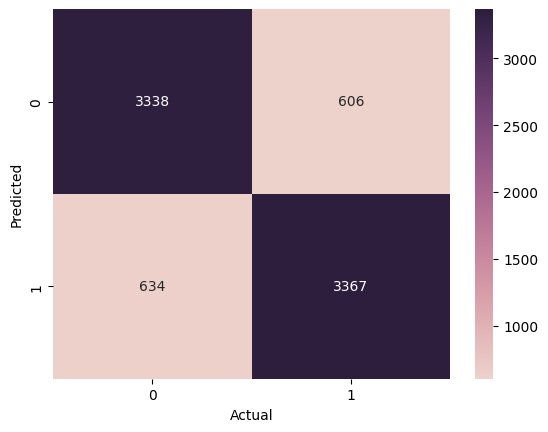

In [133]:
label_pred = classifier.predict(text_test_vectorized)
cm = confusion_matrix(label_test, label_pred, labels = reviews['label'].unique())
df_cm = pd.DataFrame(cm, index = reviews['label'].unique(), columns = reviews['label'].unique())

sb.heatmap(cm, annot=True , fmt="d", cmap=sb.cubehelix_palette(as_cmap=True))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [134]:
df_cm_per = df_cm.copy()
for i in df_cm_per:
    df_cm_per[i]/=df_cm_per[i].sum()
df_cm_per

,0,1
0,0.840383,0.15253
1,0.159617,0.84747


ROC curve

In [135]:
from sklearn.metrics import roc_curve, auc

In [136]:
fpr, tpr, threshold = roc_curve(label_test, label_pred)
#a_u_c = auc(fpr, tpr)

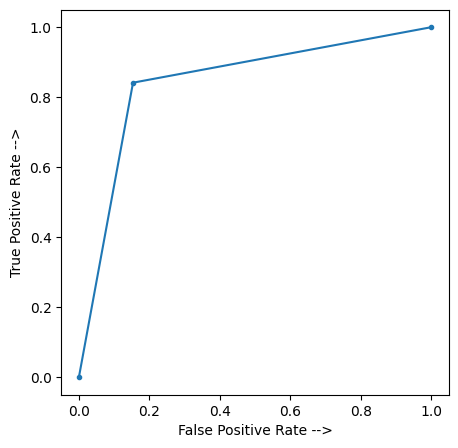

In [137]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, marker='.')

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.show()

F1 score

In [138]:
print(classification_report(label_test, label_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      3944
           1       0.85      0.84      0.84      4001

    accuracy                           0.84      7945
   macro avg       0.84      0.84      0.84      7945
weighted avg       0.84      0.84      0.84      7945

